In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
from astropy.time import Time


In [4]:
from alerce.api import AlerceAPI
client = AlerceAPI()

In [5]:
t2=pd.read_csv('Table2.txt', comment='#',sep= '\s+')

In [7]:
cepi=t2[(t2.Type=='CEP')]
cepii=t2[(t2.Type=='CEPII')]
#cepmask=['CEP'in a for a in t2['Type'].values]
#cep=t2[cepmask]
cep=t2[t2['Type'].isin(['CEP','CEPII'])]

In [8]:
def qcoord (ob): 
    params = {
        "records_per_pages": 100,
        "query_parameters": {
            "coordinates":{
                "ra": ob.RAdeg,
                "dec": ob.DEdeg,
                "sr": 1#arcsec
            },}
    }
    return client.query(params, format='pandas')


## ALeRCE xmatch

In [9]:
dos,mas=0,0
cepr=[]
cepm=[]
cepalr=[]
for i,ob in cep.iterrows():
    try:
        res = qcoord(ob)
        cepr.append(i)
        res['idlist']=i
        cepalr.append(res.iloc[0])
        if res.shape[0]==2:
            dos+=1
        if res.shape[0]>2:
            mas+=1
    except:
        cepm.append(i)

In [10]:
print(str(len(cep))+' cepheid variables included on the list, '  + str(len(cepr))+' reported by ALeRCE, '+str(len(cepm))+' missing')

print(str(len(cepm)*100/len(cep))+'% missing')

1620 cepheid variables included on the list, 1438 reported by ALeRCE, 182 missing
11.234567901234568% missing


In [11]:
peri=sum(cep.loc[cepm]['Type']=='CEP')*100/sum(cep['Type']=='CEP')
perii=sum(cep.loc[cepm]['Type']=='CEPII')*100/sum(cep['Type']=='CEPII')
print(str(peri)+'% cep I missing, '+str(perii)+'% cep II missing')

12.678288431061807% cep I missing, 6.145251396648045% cep II missing


## Parameter analysis of the reported cep stars

In [13]:

#cepro,cepmo=cepr,cepm
cepm=cep.loc[cepm][cep.loc[cepm]['Type']=='CEP'].index
cepr=cep.loc[cepr][cep.loc[cepr]['Type']=='CEP'].index

In [14]:
len(cepr)

1102

In [21]:
def hist_inter(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

Text(0.5, 1.0, 'coordinates comparison')

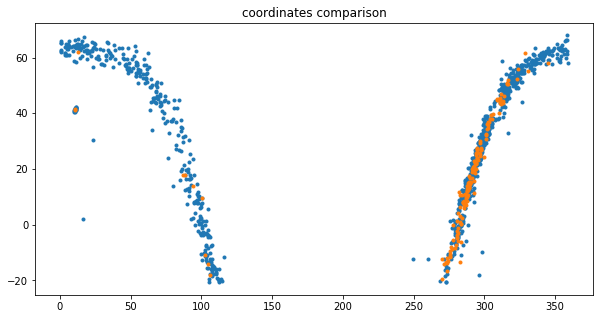

In [51]:
plt.scatter(cep.loc[cepr]['RAdeg'],cep.loc[cepr]['DEdeg'],marker='.')
plt.scatter(cep.loc[cepm]['RAdeg'],cep.loc[cepm]['DEdeg'],marker='.')
plt.title('coordinates comparison')

17.997311875
279.17582675000006


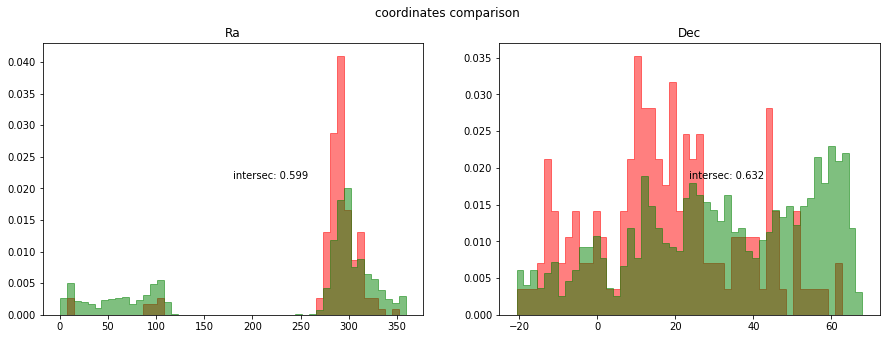

In [228]:
bn=50
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('coordinates comparison')
n, bins, patches =ax1.hist((cep.loc[cepr]['RAdeg'],cep.loc[cepm]['RAdeg']), bins=bn,density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
ax1.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
ax1.set_title('Ra')
n, bins, patches =ax2.hist((cep.loc[cepr]['DEdeg'],cep.loc[cepm]['DEdeg']), bins=bn,density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
ax2.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
ax2.set_title('Dec')
plt.show
print(cep.loc[cepm]['DEdeg'].mean())
print(cep.loc[cepm]['RAdeg'].mean())

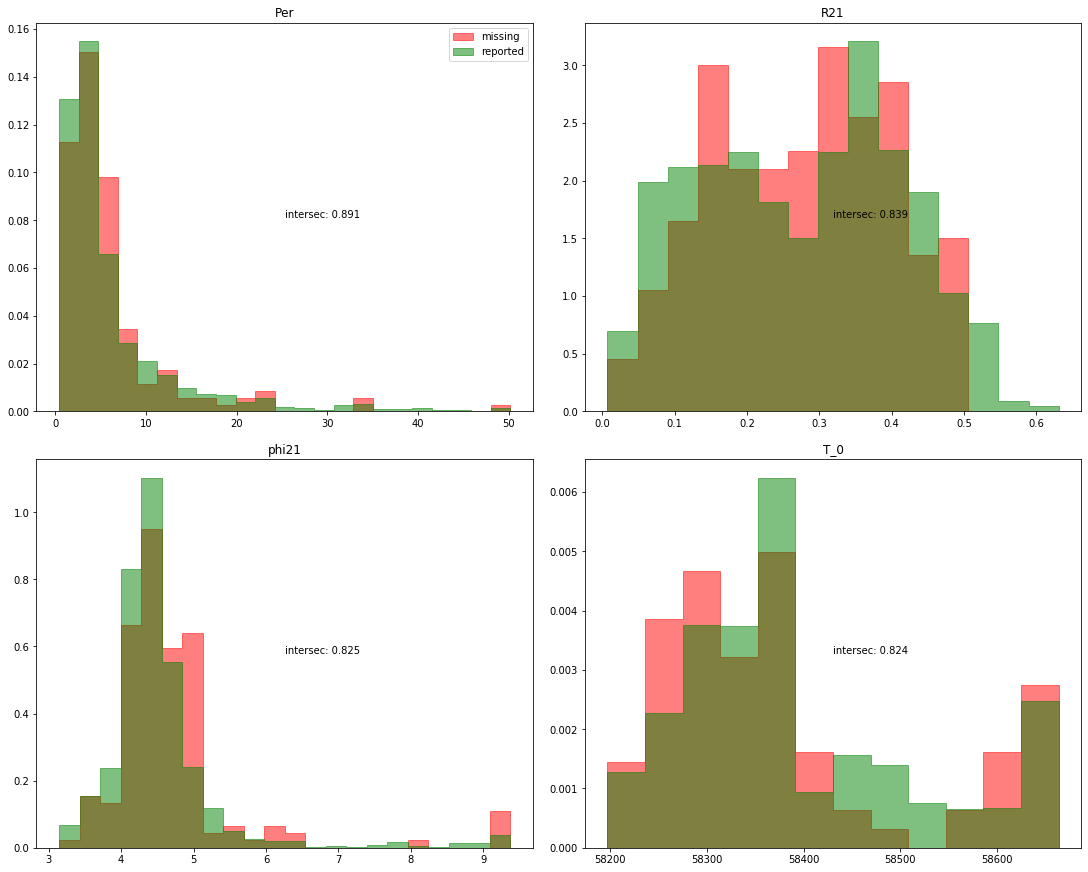

In [107]:
params=cep.columns[4:8]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
ints=[]
for ax, par in zip(axs.flat, params):
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par],cep.loc[cepm][par]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

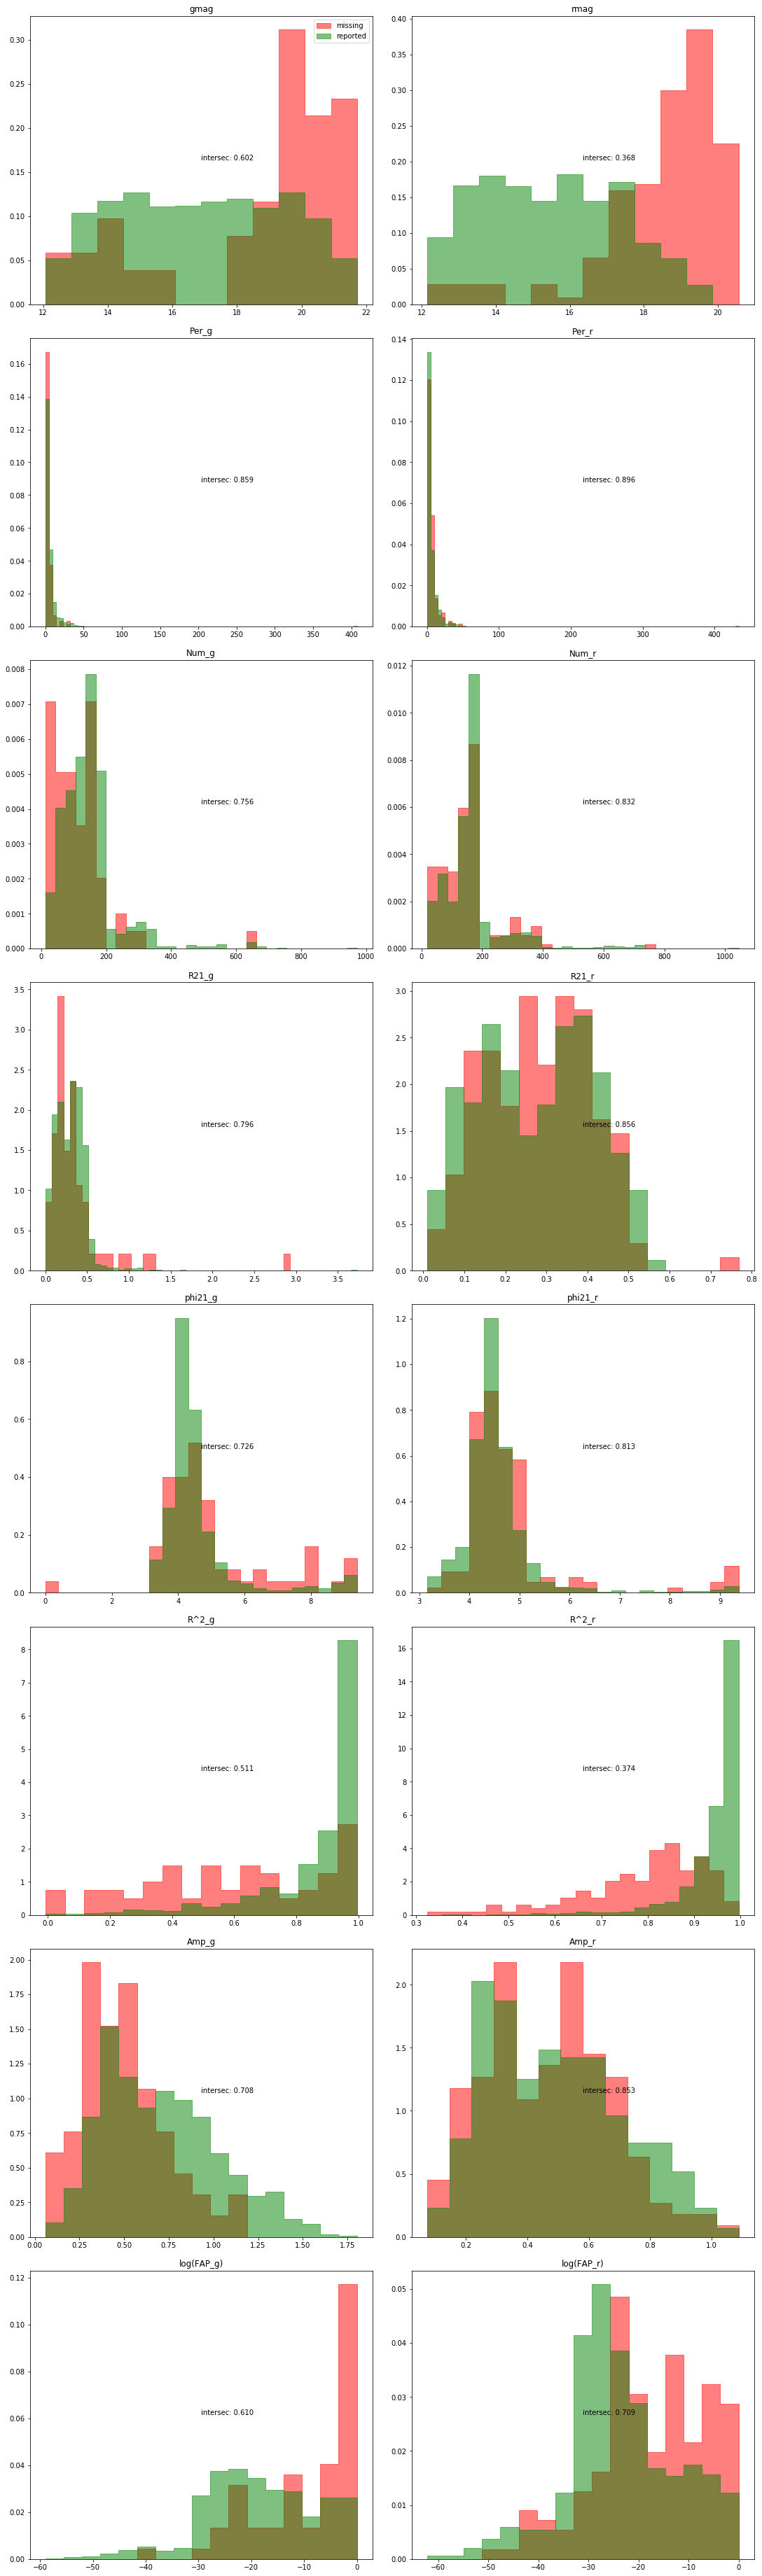

In [129]:
## mask stars with no obs in a band por the band parameters
params=cep.columns[8:-2]
fig1, axs = plt.subplots(len(params)//2, 2,  constrained_layout=True,figsize=(15,3*len(params)))
i=0
for ax, par in zip(axs.flat, params):
    m='gmag' if (i % 2) == 0 else 'rmag'
    i+=1
    maskm=cep.loc[cepm][m]!=0.
    maskr=cep.loc[cepr][m]!=0.
    ax.set_title(par)
    n, bins, patches =ax.hist((cep.loc[cepr][par][maskr],cep.loc[cepm][par][maskm]), bins='scott',density=1,histtype='step',fill=True,alpha=0.5,color=('g','r'))
    ax.annotate(('intersec: '+'%.3f'%(hist_inter(n[0],n[1]))),xy=(0.5, 0.5), xycoords='axes fraction')
axs.flat[0].legend(lab)

### Observaciones:

1620 cepheid variables included on the list, 1438 reported by ALeRCE, 182 missing
11.2% missing

12.7% cep I missing, 6.1% cep II missing

the coordinates of the missing stars are concentrated at ra=279 dec=18 deg aproz, with a notable absence in the region ra=0-100, dec=50-67

#### Parameters with intersection below 0.5:

 gmag, rmag:missing stars concentrated at weaker magnitudes, mag<19 aprox
 
 R² both bands: greater number of reported at values closer to 1

#### Parametros:


RAdeg   Right Ascension in decimal degrees (J2000)        
DEdeg   Declination in decimal degrees (J2000)            
Per     Period (d)                                           
R21     Ratio of a_2_/a_1_  (amplitude ratio )                             
phi21   The {phi}_2_ - 2*{phi}_1_ (phase difference)                                                
d       T_0     HJD of Minimum                                    
gmag    Mean ZTF g band magnitude                         
rmag    Mean ZTF r band magnitude                         
d       Per_g   Period determined in g band                       
d       Per_r   Period determined in r band                       
Num_g   Number of detections in g band                    
Num_r   Number of detections in r band                    
R21_g   Ratio of a_2_/a_1_ in g band                      
R21_r   Ratio of a_2_/a_1_ in r band                      
phi21_g The {phi}_2_ - 2*{phi}_1_ in g band               
phi21_r The {phi}_2_ - 2*{phi}_1_ in r band               
R^2_g   R-square in g band                                
R^2_r   R-square in r band                                
mag     Amp_g   Amplitude in g band                               
mag     Amp_r   Amplitude in r band                               
log(FAP_g) False alarm probability in g band                 
log(FAP_r) False alarm probability in r band                 
Type    Variable type
Delta_min_g Minumum difference in g band
Delta_min_r Minumum difference in r band           

## Reported stars

In [139]:
cepalr=pd.DataFrame(cepalr)
classdict={'Other': 0,'Ceph': 1,'LPV': 4,'RRL': 5,'EB': 3,'SNe': 6,'DSCT': 2,'Blazar': 8,'CV/Nova': 9,'SLSN': 14,'AGN': 18,'SN': 19,'Variable Star': 20,'Asteroid': 21,'Bogus': 22,'SNIa': 10,'SNIbc': 11,'SNII': 12,'SNIIn': 13,'EBSD/D': 15,'EBC': 16,'Periodic-Other': 17,'AGN-I': 7,'RS-CVn': 23,'QSO-I':24}
classdict = {v: k for k, v in classdict.items()}
cepalr=cepalr.replace({"classearly": classdict})
cepalr=cepalr.replace({"classrf": classdict})

Text(0.5, 0.98, 'ALeRCE classification of the reported stars')

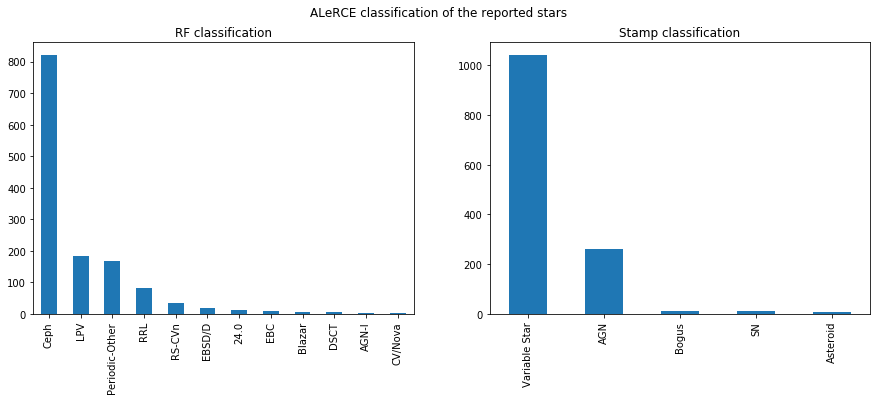

In [214]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

cepalr['classrf'].value_counts().plot(ax=ax1,kind='bar',title='RF classification')
cepalr['classearly'].value_counts().plot(ax=ax2,kind='bar',title='Stamp classification')
fig.suptitle('ALeRCE classification of the reported stars')

In [208]:
Time(cepalr['firstmjd'].max(),format='mjd').isot

'2020-07-16T09:08:00.004'

In [210]:
#////
records_per_page = 100000
params = {
    "records_per_pages": records_per_page,
    "query_parameters": {
        "filters": {
            "classrf": 1,
            #"classearly":classearly,
            "nobs": {
                #"min": min_nobs,
                #"max": max_nobs
            }
        },
        "dates": {
                "firstmjd": {
                   # "min": min_firstmjd,
                    #"max": max_firstmjd
                }
            },
    }
}
alrcep = client.query(params, format='pandas')

(14362, 43)


In [217]:
print(str(alrcep.shape[0])+' objects classified as cep')

14362 objects classified as cep
